In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
def import_data(date_from:str, date_to:str, df_path:str, columns, static:bool):
    """
    Imports data and merges into one dataframe.

    Args:
        date_from (format: 'yyyy-mm-dd'): Period starting date (included).

        date_to (format: 'yyyy-mm-dd'): Period end date (included).

        df_path: Path to folder with daily data files.

    Returns:
        pandas.DataFrame: Dataframe with all merged data.
    """
    
    if static:
        try: 
            file_ = pd.read_parquet(df_path + 'melt_'+ str(date_from) + '_extended.parquet.gzip') 
            file_ = file_[columns]
            return file_
        except:
            print("No data for given date")
            return None
    
    date_range = pd.date_range(date_from, date_to, freq="M") # both ends included
    month_range = [str(date.month) for date in date_range]
    month_range = [month if len(month) == 2 else '0' + month for month in month_range]
    df_list = []

    
    for month in tqdm(month_range):
        # pick 3 random days in given month
        day_count = 0
        while day_count < 4:
            melt_date = str(date_range[month_range.index(month)].year) + '-' + month + '-' + str(np.random.randint(1, 31))
            try: # bc some days are empty
                file_ = pd.read_parquet(df_path + 'melt_'+ melt_date + '_extended.parquet.gzip') 
                file_ = file_[columns]
                df_list.append(file_) # list of df
                day_count = day_count + 1
                print("chosen date: ", melt_date)
            except:
                continue

    df = pd.concat(df_list, axis=0) # concat af df to one

    del df_list
    
    return df

In [4]:
df_path = r'../../AWS_Data/Data/dataframe_extended/'

In [3]:
# path to my hard drive (Nina)
df_path = r"D:/MasterThesis/dataframe_extended/"

In [4]:
static_features = ["x", "y", "col", "row", "elevation_data", "slope_data", "aspect_data", "distance_to_margin"]
static_data = import_data(date_from='2018-05-01', date_to='2018-05-01', df_path=df_path, columns = static_features, static=True)
static_data

,x,y,col,row,elevation_data,slope_data,aspect_data,distance_to_margin
0,-636500.0,-662500.0,0,0,14.0,0.000000,1.000000e+00,150.0
1,-635500.0,-662500.0,1,0,14.0,0.000000,1.000000e+00,150.0
2,-634500.0,-662500.0,2,0,14.0,0.000000,1.000000e+00,150.0
3,-633500.0,-662500.0,3,0,14.0,0.000000,1.000000e+00,150.0
4,-632500.0,-662500.0,4,0,14.0,0.000000,1.000000e+00,150.0
...,...,...,...,...,...,...,...,...
2278720,58500.0,-3324500.0,695,2662,44.0,6.476357,1.761841e-02,5.0
2278721,59500.0,-3324500.0,696,2662,44.0,0.630228,1.000000e+00,4.0
2278722,60500.0,-3324500.0,697,2662,44.0,0.040514,7.071068e-01,3.0
2278723,61500.0,-3324500.0,698,2662,45.0,0.028648,-1.836970e-16,2.0


In [28]:
dynamic_features = ["mw_value", "opt_value", "mean_3", "mean_9", "sum_5", "mw_value_yesterday",	"mw_value_7_day_average","hours_of_daylight"]
dynamic_data = import_data(date_from='2018-05-01', date_to='2018-10-31', df_path=df_path, columns = dynamic_features, static=False)
dynamic_data

  0%|          | 0/6 [00:00<?, ?it/s]

chosen date:  2018-05-29
chosen date:  2018-05-14
chosen date:  2018-05-26


 17%|█▋        | 1/6 [00:02<00:14,  2.97s/it]

chosen date:  2018-05-17
chosen date:  2018-06-11
chosen date:  2018-06-15
chosen date:  2018-06-25


 33%|███▎      | 2/6 [00:05<00:10,  2.57s/it]

chosen date:  2018-06-11
chosen date:  2018-07-28
chosen date:  2018-07-30
chosen date:  2018-07-22


 50%|█████     | 3/6 [00:07<00:07,  2.36s/it]

chosen date:  2018-07-10
chosen date:  2018-08-10
chosen date:  2018-08-26
chosen date:  2018-08-28


 67%|██████▋   | 4/6 [00:09<00:04,  2.36s/it]

chosen date:  2018-08-20
chosen date:  2018-09-30
chosen date:  2018-09-19
chosen date:  2018-09-29


 83%|████████▎ | 5/6 [00:12<00:02,  2.39s/it]

chosen date:  2018-09-11
chosen date:  2018-10-13
chosen date:  2018-10-29
chosen date:  2018-10-19


100%|██████████| 6/6 [00:14<00:00,  2.43s/it]

chosen date:  2018-10-11


,mw_value,opt_value,mean_3,mean_9,sum_5,mw_value_yesterday,mw_value_7_day_average,hours_of_daylight
0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,24.000000
1,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,24.000000
2,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,24.000000
3,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,24.000000
4,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,24.000000
...,...,...,...,...,...,...,...,...
2278720,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,10.663493
2278721,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,10.663501
2278722,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,10.663510
2278723,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,10.663519


# Feature Distributions

In [30]:
# plot distribution of features
def plot_feature_dist(df):
    """
    Plots distribution of features.

    Args:
        df (pandas.DataFrame): Dataframe with features.

        features (list): List of features to plot.
    """
    for feature in df.columns:
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_title(feature)

        if feature == "opt_value":
            # drop values of -1
            ax.hist(df[df[feature] != -1][feature], bins=100)
            # add vertical line at 0.64
            ax.axvline(x=0.64, color='r', linestyle='--')
        else:
            ax.hist(df[feature].dropna(), bins=100)
        plt.show()

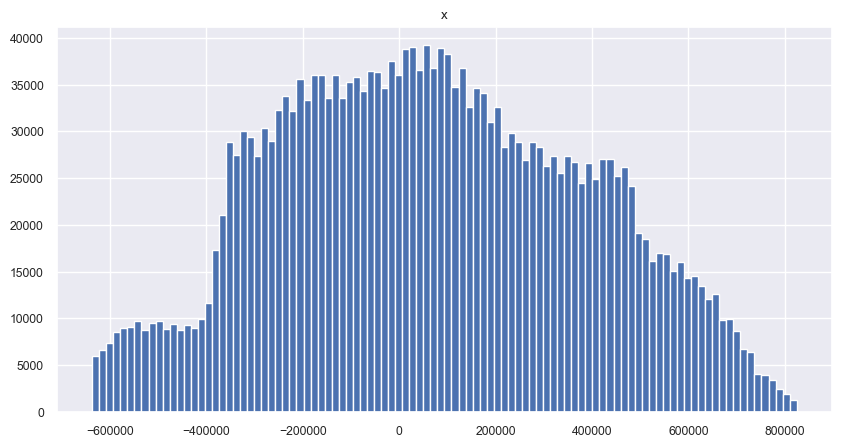

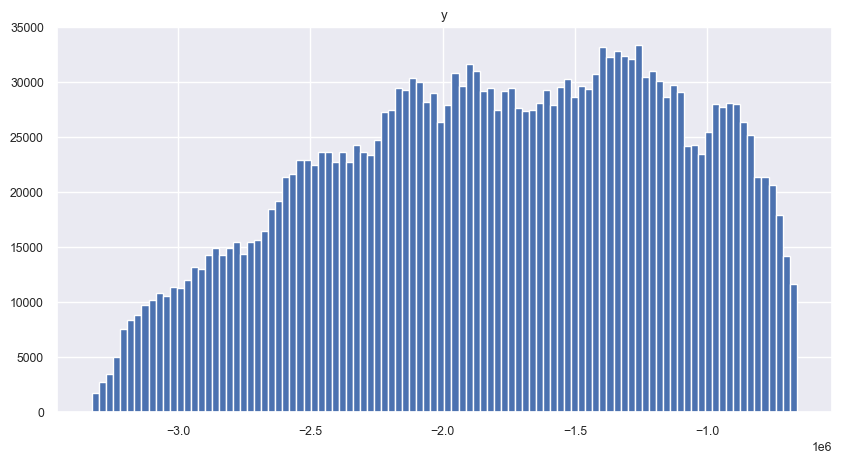

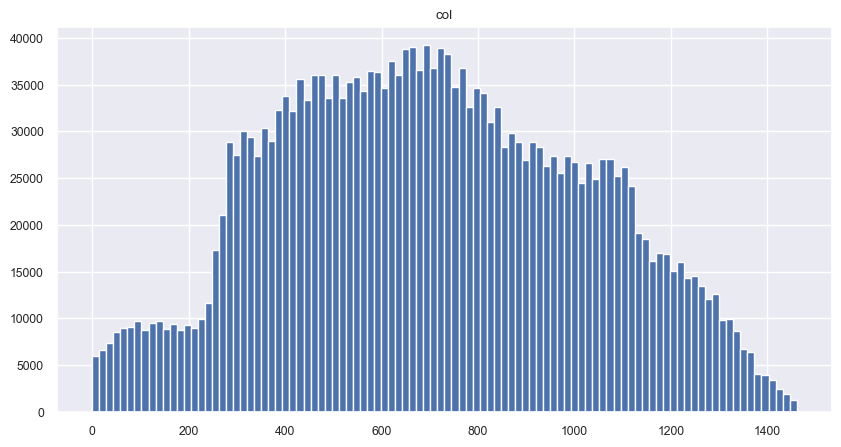

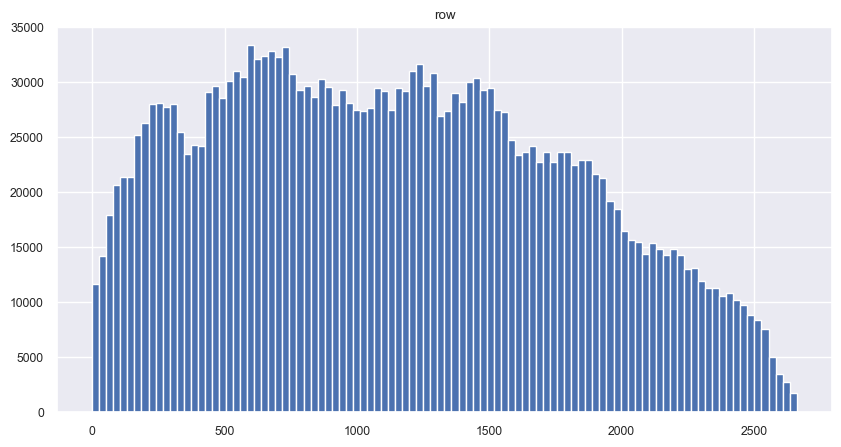

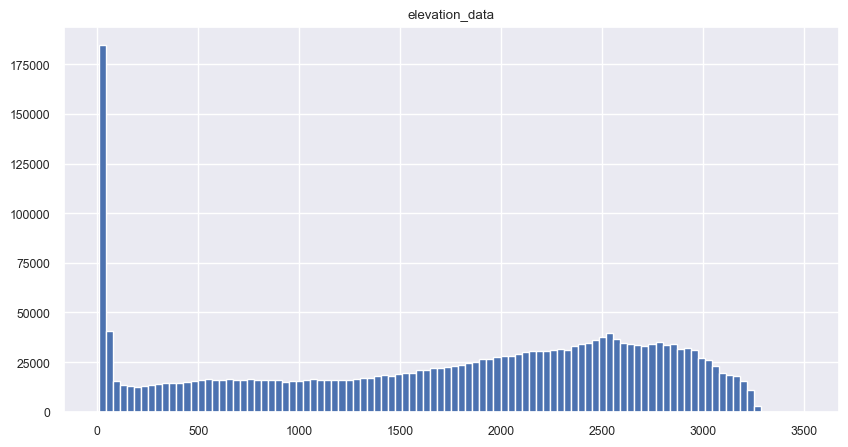

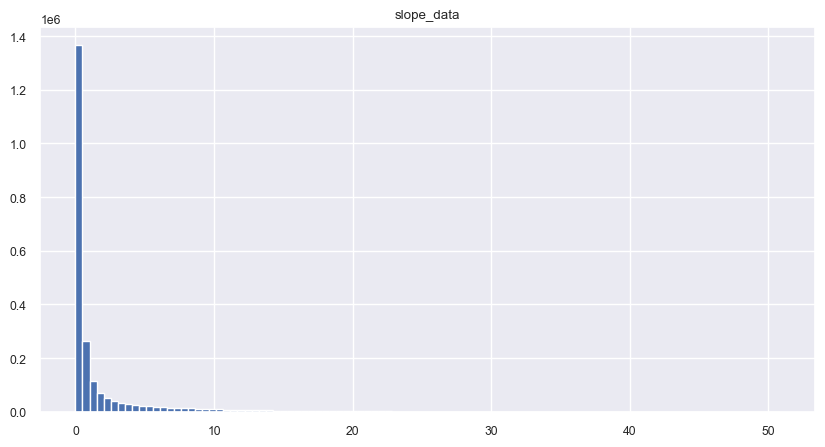

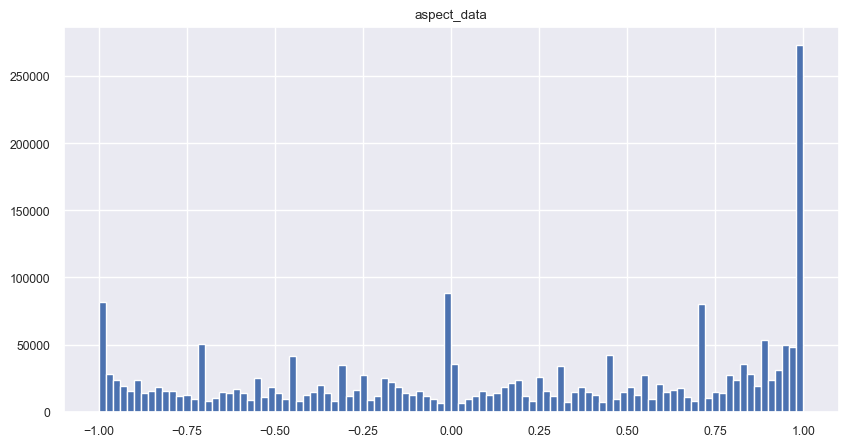

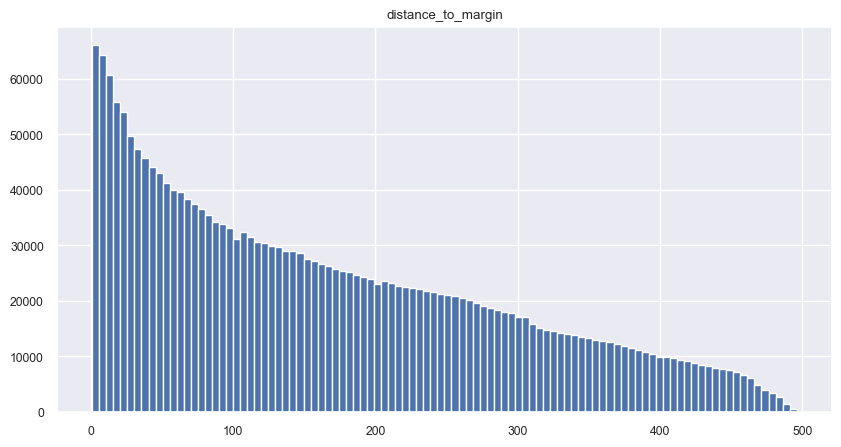

In [20]:
plot_feature_dist(static_data)

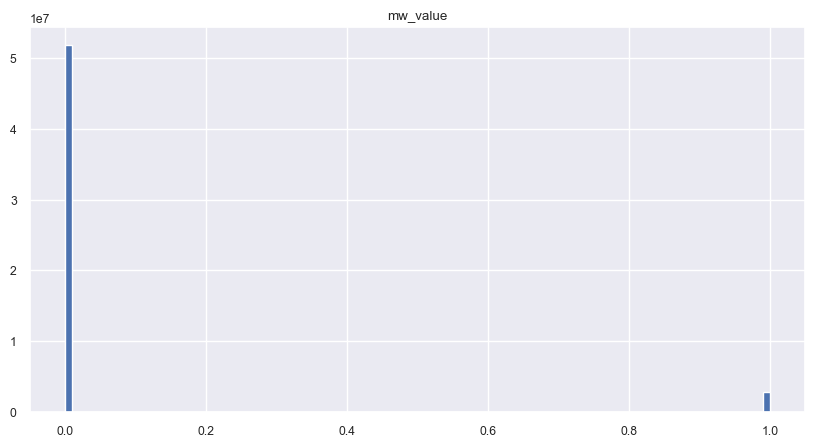

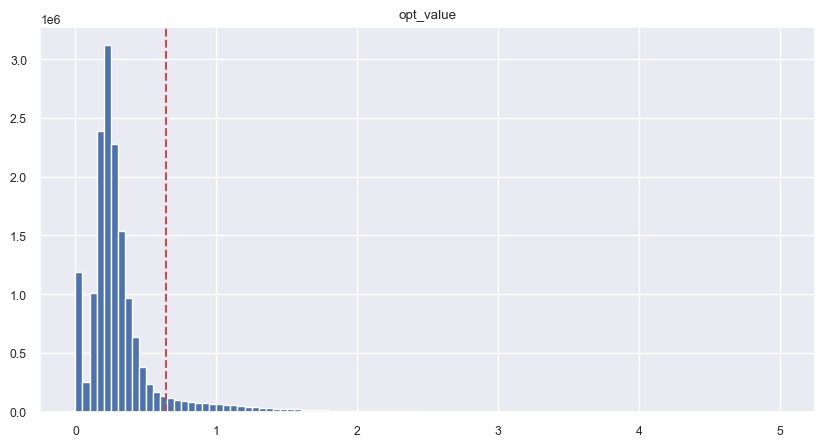

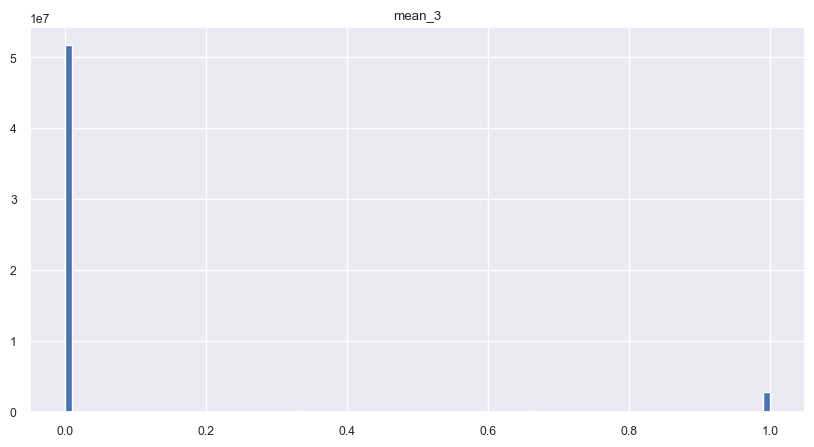

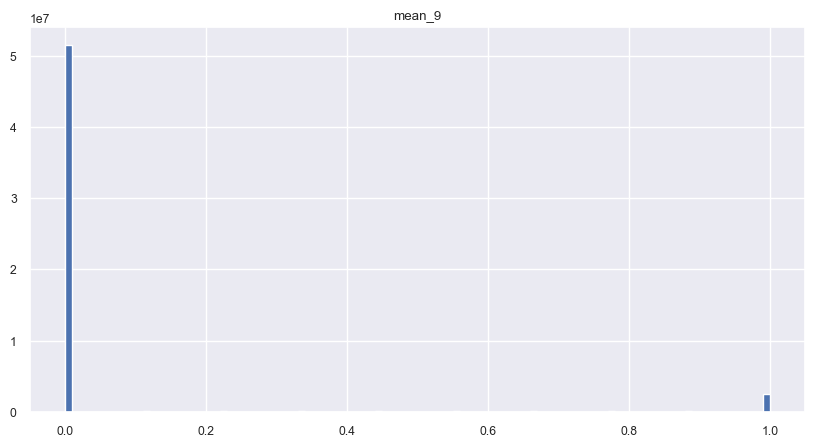

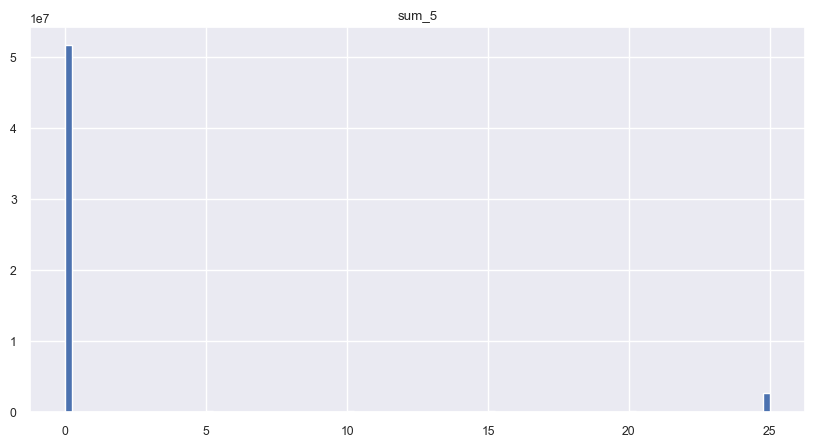

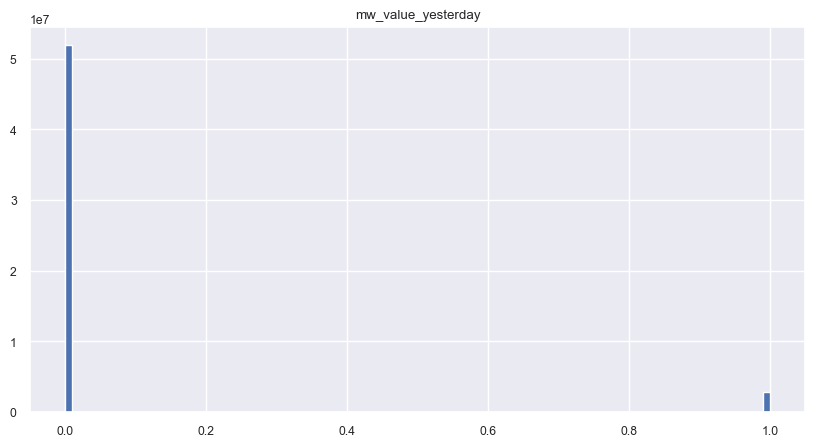

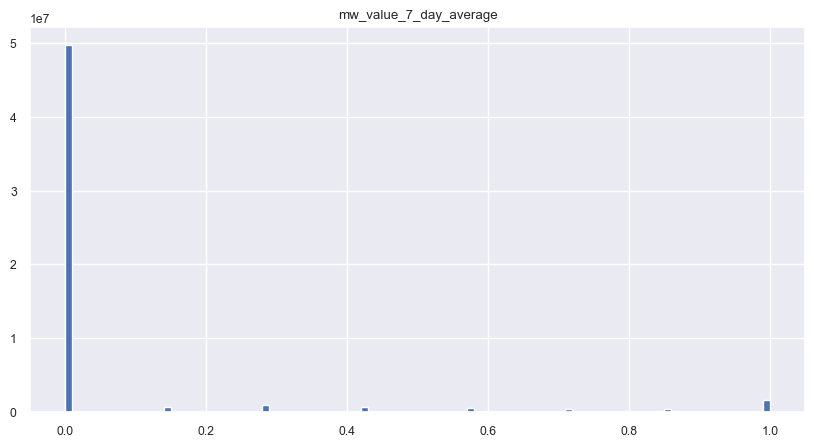

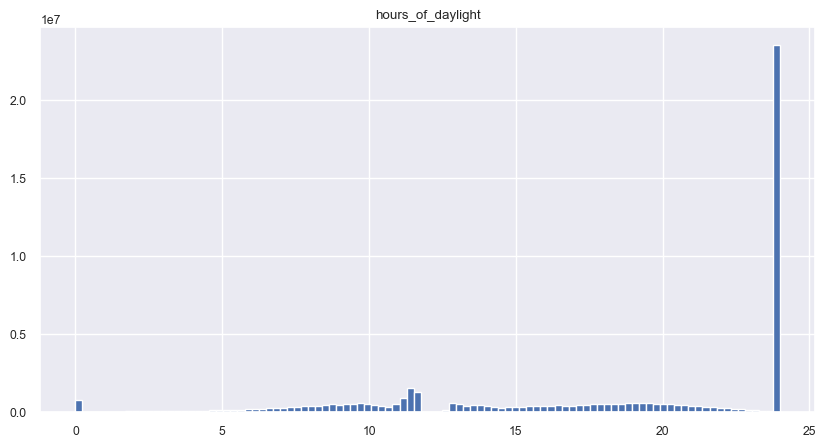

In [29]:
plot_feature_dist(dynamic_data)

# Feature Plots

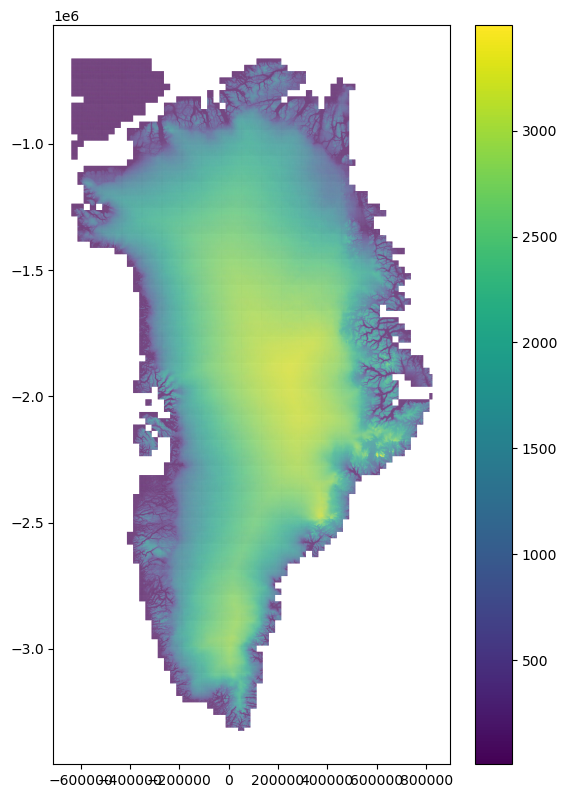

In [59]:
fig, ax = plt.subplots(figsize=(6.4, 4.8*2))

plt.scatter(static_data["x"], static_data["y"],  edgecolor='none', s = 0.05, c=static_data["elevation_data"], label = 'melt')

plt.colorbar()

plt.show()

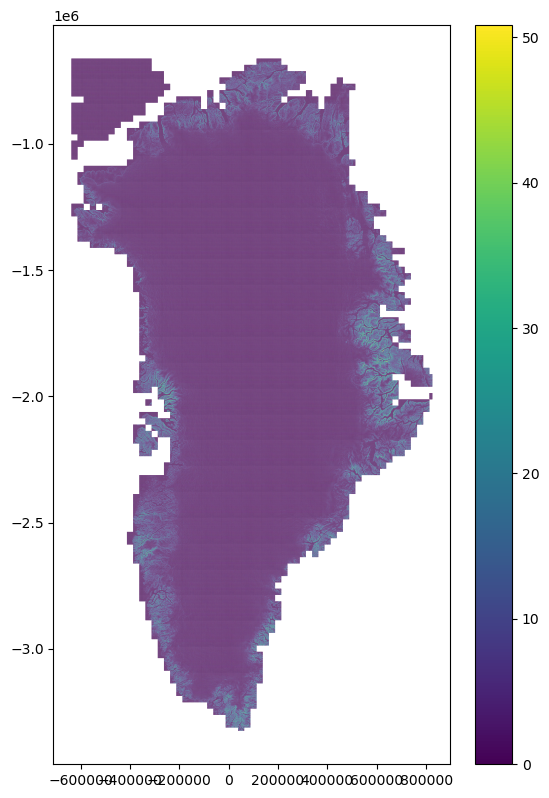

In [57]:
fig, ax = plt.subplots(figsize=(6.4, 4.8*2))

plt.scatter(static_data["x"], static_data["y"],  edgecolor='none', s = 0.05, c=static_data["slope_data"], label = 'melt')

plt.colorbar()

plt.show()

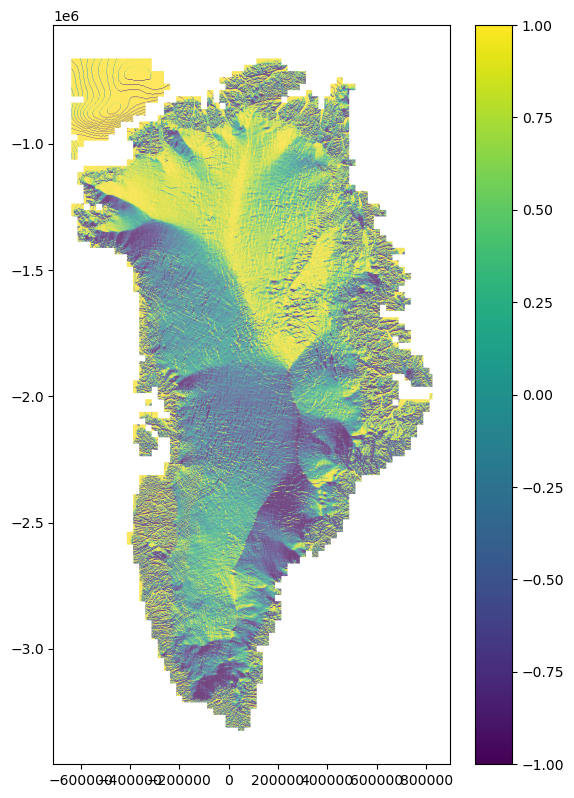

In [58]:
fig, ax = plt.subplots(figsize=(6.4, 4.8*2))

plt.scatter(static_data["x"], static_data["y"],  edgecolor='none', s = 0.05, c=static_data["aspect_data"], label = 'melt')

plt.colorbar()

plt.show()

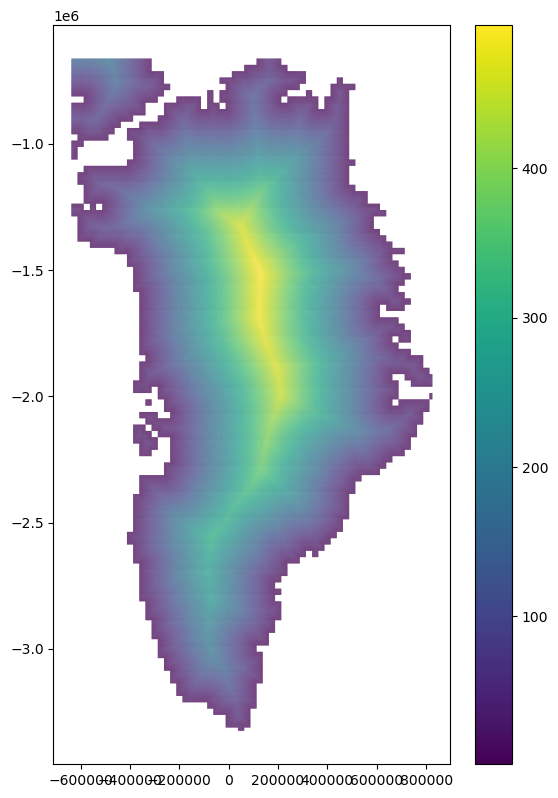

In [60]:
fig, ax = plt.subplots(figsize=(6.4, 4.8*2))

plt.scatter(static_data["x"], static_data["y"],  edgecolor='none', s = 0.05, c=static_data["distance_to_margin"], label = 'melt')

plt.colorbar()

plt.show()

# Feature Correlation 

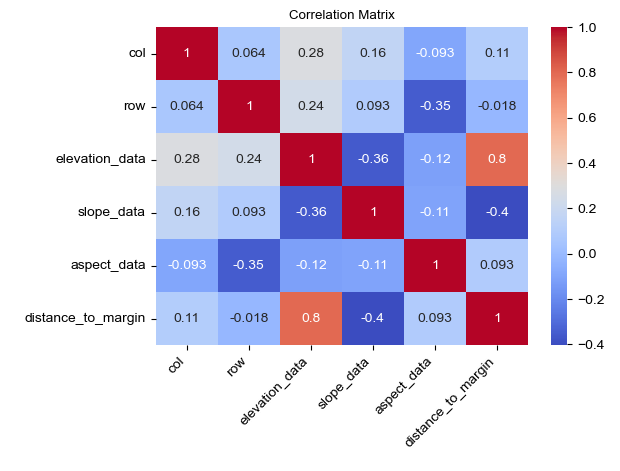

In [13]:
# Calculate correlation matrix
static_corr_matrix = static_data.drop(columns=["x", "y"]).corr()
sns.heatmap(static_corr_matrix, annot=True, cmap='coolwarm')

# Customize heatmap
sns.set(font_scale=0.8)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

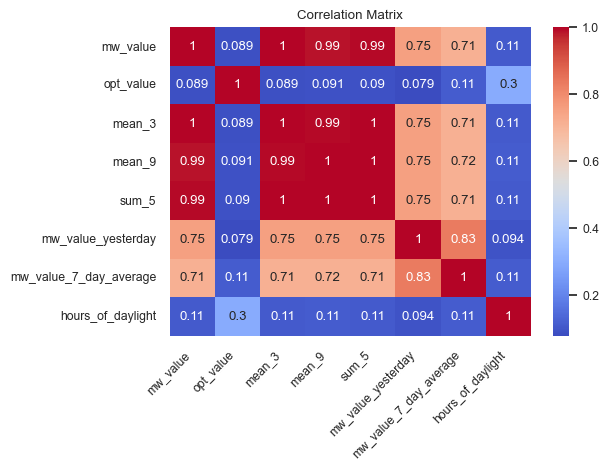

In [16]:
# Calculate correlation matrix
dynamic_corr_matrix = dynamic_data.corr()
sns.heatmap(dynamic_corr_matrix, annot=True, cmap='coolwarm')

# Customize heatmap
sns.set(font_scale=0.8)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()